#**Projet Text mining**

#**Objectif du projet :Le projet consiste à développer une application qui permet de résumer des textes. L'objectif de ce projet est d'appliquer les connaissances acquises en cours de text mining.**

##**Importation des Bibliothèques Nécessaires**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Téléversez le fichier et assurez-vous que le nom est 'articles_cnn1.csv'
data = pd.read_csv('/content/articles_cnn1.csv')
data.head()

,Titre,Résumé,Contenu
0,Israel is at war with Hamas. Here’s what to know,"Israel and Hamas are at war, after the Palesti...","Israel and Hamas are at war, after the Palesti..."
1,"One month on, what we know about the Israel-Ha...","Israel and Hamas are at war, after the Palesti...",Israel and the Palestinian militant group Hama...
2,Israel formally declares war against Hamas as ...,"Israel has formally declared war on Hamas, set...","Israel has formally declared war on Hamas, set..."
3,Israel vows more raids in Gaza as calls for ce...,Israel conducted a “targeted raid” using tanks...,Israel’s military conducted a “targeted raid” ...
4,Israel is at war with Hamas. Here’s what to know,The Israeli military has told all civilians in...,The Israeli military has told all civilians in...


#**Partie1: Analyse Exploratoire des Données**

##**Affichage de la 1ère ligne du Dataset**

In [ ]:
first_row = data.iloc[0]
first_row

Titre       Israel is at war with Hamas. Here’s what to know
Résumé     Israel and Hamas are at war, after the Palesti...
Contenu    Israel and Hamas are at war, after the Palesti...
Name: 0, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Titre    154 non-null    object
 1   Résumé   154 non-null    object
 2   Contenu  154 non-null    object
dtypes: object(3)
memory usage: 3.7+ KB


##**Analyse de Dimension**

In [ ]:
# Analyse de base
print("Dimension du dataset:", data.shape)
print("Types de données:\n", data.dtypes)
print("Valeurs manquantes:\n", data.isnull().sum())

Dimension du dataset: (154, 3)
Types de données:
 Titre      object
Résumé     object
Contenu    object
dtype: object
Valeurs manquantes:
 Titre      0
Résumé     0
Contenu    0
dtype: int64


In [ ]:
duplicates = data.duplicated().any()
if duplicates:
    print("There are duplicate rows.")
else:
    print("No duplicate rows.")

There are duplicate rows.


##**Affichage des statistiques des colonnes**

In [ ]:
# Summary statistics
print("data - Summary Statistics:")
print(data.describe())

data - Summary Statistics:
                                                   Titre  \
count                                                154   
unique                                               151   
top     Israel is at war with Hamas. Here’s what to know   
freq                                                   2   

                                                   Résumé  \
count                                                 154   
unique                                                152   
top     Israel and Hamas are at war, after the Palesti...   
freq                                                    2   

                                                  Contenu  
count                                                 154  
unique                                                151  
top     Israeli Prime Minister Benjamin Netanyahu boas...  
freq                                                    2  


##**Nuage de mots :  visualiser les termes les plus communs dans la colonne "Contenu"**

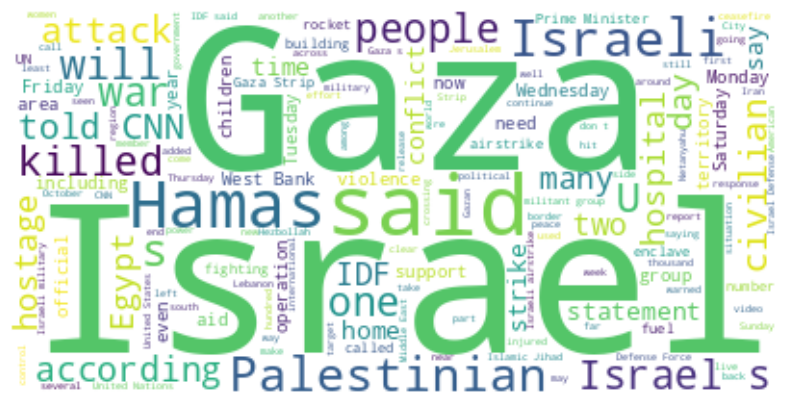

In [ ]:
# Nuage de mots pour la colonne 'Contenu'
text = " ".join(article for article in data.Contenu)
wordcloud = WordCloud(background_color='white').generate(text)

# Affichage du nuage de mots
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##**Nuage de mots :  visualiser les termes les plus communs dans la colonne "Résumé"**

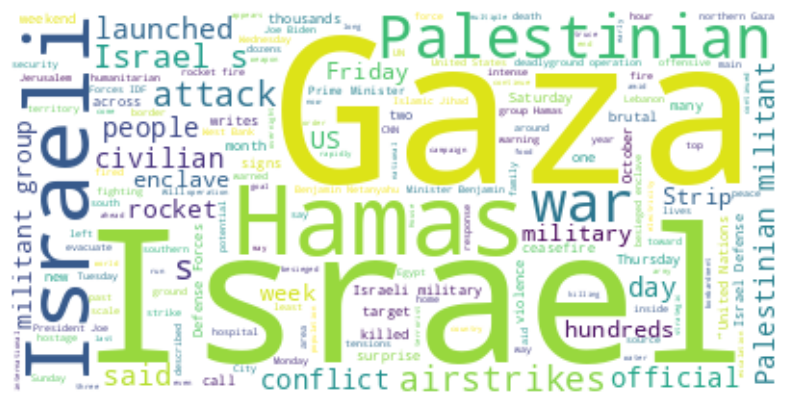

In [ ]:
# Nuage de mots pour la colonne 'Résumé'
text = " ".join(article for article in data.Résumé)
wordcloud = WordCloud(background_color='white').generate(text)

# Affichage du nuage de mots
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##**Nuage de mots :  visualiser les termes les plus communs dans la colonne "Titre"**

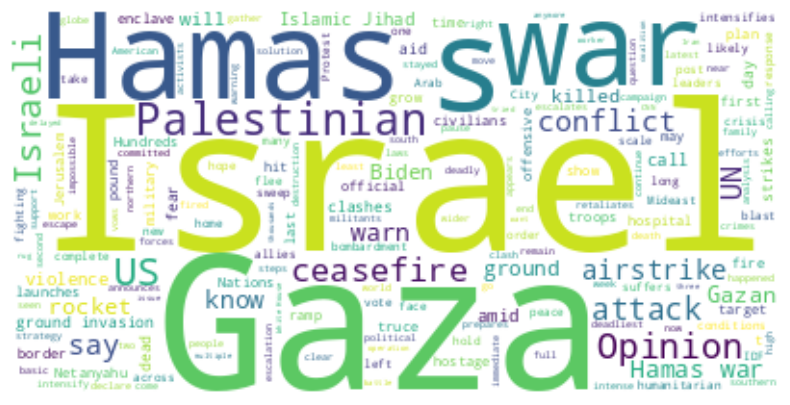

In [ ]:
# Nuage de mots pour la colonne 'Titre'
text = " ".join(article for article in data.Titre)
wordcloud = WordCloud(background_color='white').generate(text)

# Affichage du nuage de mots
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##**Distribution de la longueur des Articles**

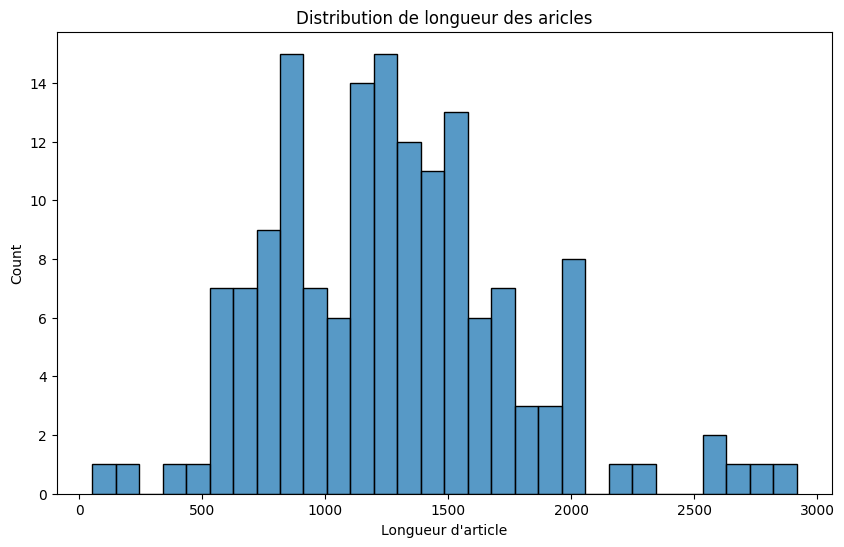

In [ ]:
# Distribution of article length
data['article_len'] = data['Contenu'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='article_len', bins=30)
plt.title("Distribution de longueur des aricles")
plt.xlabel("Longueur d'article")
plt.show()

##**Distribution des Sentiments**

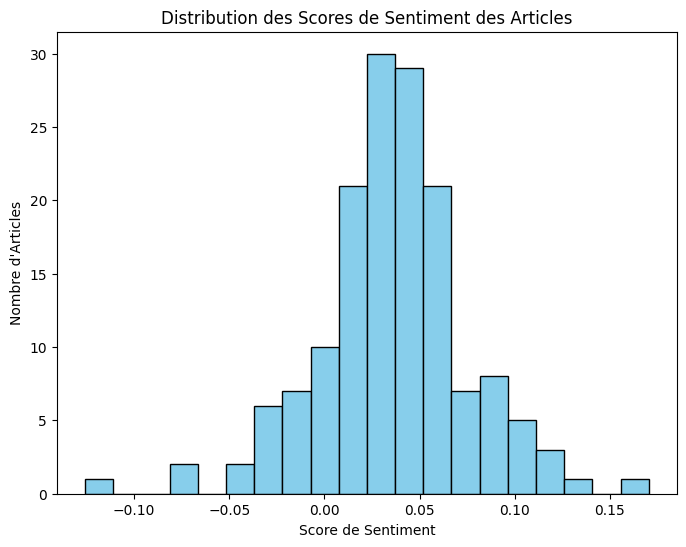

In [ ]:
from textblob import TextBlob

# Calcul du score de sentiment pour chaque article
data['Sentiment'] = data['Contenu'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Histogramme de la distribution des sentiments
plt.figure(figsize=(8, 6))
plt.hist(data['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des Scores de Sentiment des Articles')
plt.xlabel('Score de Sentiment')
plt.ylabel('Nombre d\'Articles')
plt.show()

##**Interprétation**:
L'histogramme que vous avez fourni montre la distribution des scores de sentiment des articles. Voici quelques observations que l'on peut faire à partir de cette visualisation :
La distribution des scores de sentiment semble être centrée autour de zéro, ce qui suggère que la majorité des articles ont un ton neutre.
Il y a une légère inclinaison vers les sentiments positifs, comme en témoigne la concentration plus élevée de barres à droite de zéro.
Le pic de la distribution est entre 0 et 0.05, ce qui indique que la plupart des articles ont un sentiment légèrement positif.
Il y a très peu d'articles avec des sentiments fortement négatifs ou positifs, étant donné que les extrémités de l'histogramme ont des hauteurs très basses.
Les scores de sentiment varient légèrement, mais restent relativement bas en magnitude, ce qui peut indiquer que les articles utilisent un langage modéré ou objectif plutôt que des mots chargés émotionnellement.
Globalement, cet histogramme peut indiquer que les articles de ce dataset traitent leur sujet avec une certaine objectivité, sans pencher fortement vers des tonalités émotionnelles positives ou négatives. Cela pourrait être typique des articles d'actualité qui visent à présenter les faits de manière équilibrée.

##**Partie 2: Transformation de la dataset**

##**Enrichissement des Données :**

 **L'analyse de sentiment** est un processus qui permet de déterminer si un texte exprime un sentiment positif, négatif ou neutre. Cette technique est largement utilisée dans divers domaines, comme le marketing, la surveillance des médias sociaux, et les études de produits, pour comprendre les opinions et les réactions des gens.

 **VADER**, intégré dans NLTK, est particulièrement performant pour analyser les sentiments dans les textes provenant des médias sociaux, des critiques, et d'autres textes où les gens expriment ouvertement leurs opinions. Il utilise une combinaison de règles grammaticales et syntaxiques ainsi qu'un dictionnaire de mots sentimentaux (avec des scores de sentiment associés) pour évaluer le sentiment d'un texte. Ce qui rend VADER unique, c'est sa capacité à comprendre non seulement les mots de base mais aussi le contexte dans lequel ils sont utilisés, y compris l'utilisation de majuscules, de ponctuations et de modificateurs d'intensité qui peuvent influencer le sentiment d'un mot ou d'une phrase.

In [ ]:
import nltk
nltk.download('vader_lexicon')

import csv
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialiser VADER
sia = SentimentIntensityAnalyzer()

# Préparer les données pour le nouveau fichier CSV
nouvelles_lignes = []

# Lire le fichier CSV
with open('/content/articles_cnn1.csv', 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    en_tete = next(csv_reader)  # Lire l'en-tête
    en_tete.append('Sentiment')  # Ajouter la nouvelle colonne à l'en-tête

    for row in csv_reader:
        Titre, Résumé, Contenu = row
        texte = Titre + " " + Résumé + " " + Contenu  # Combinaison des textes

        # Analyser le sentiment
        sentiment_score = sia.polarity_scores(texte)
        sentiment = "Positif" if sentiment_score['compound'] > 0 else "Négatif"

        # Ajouter la ligne modifiée à la nouvelle liste
        nouvelles_lignes.append(row + [sentiment])

# Écrire les données dans un nouveau fichier CSV
with open('votre_fichier_modifie.csv', 'w', newline='', encoding='utf-8') as new_file:
    csv_writer = csv.writer(new_file)
    csv_writer.writerow(en_tete)  # Écrire l'en-tête
    csv_writer.writerows(nouvelles_lignes)  # Écrire les nouvelles lignes

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Téléversez le fichier et assurez-vous que le nom est 'articles_cnn1.csv'
data2 = pd.read_csv('/content/votre_fichier_modifie.csv')
data2.head()

,Titre,Résumé,Contenu,Sentiment
0,Israel is at war with Hamas. Here’s what to know,"Israel and Hamas are at war, after the Palesti...","Israel and Hamas are at war, after the Palesti...",Négatif
1,"One month on, what we know about the Israel-Ha...","Israel and Hamas are at war, after the Palesti...",Israel and the Palestinian militant group Hama...,Négatif
2,Israel formally declares war against Hamas as ...,"Israel has formally declared war on Hamas, set...","Israel has formally declared war on Hamas, set...",Négatif
3,Israel vows more raids in Gaza as calls for ce...,Israel conducted a “targeted raid” using tanks...,Israel’s military conducted a “targeted raid” ...,Négatif
4,Israel is at war with Hamas. Here’s what to know,The Israeli military has told all civilians in...,The Israeli military has told all civilians in...,Négatif


In [ ]:
data2['Sentiment'].unique()

array(['Négatif', 'Positif'], dtype=object)

In [ ]:
# Maintenant, filtrez les lignes avec un sentiment positif
positive_sentiments = data2[data2['Sentiment'] == 'Positif']

# Afficher les premières lignes du DataFrame filtré
positive_sentiments

,Titre,Résumé,Contenu,Sentiment
35,White House warns Israel over post-war plans f...,White House warns Israel against reoccupying G...,The White House maintained Tuesday that it doe...,Positif
107,UN General Assembly votes to demand immediate ...,The United Nations General Assembly has voted ...,The United Nations General Assembly has voted ...,Positif
118,"Opinion: A perfectly reasonable, highly unreal...",Is there any way to bring an end to the Israel...,The brief respite from the fighting between Ha...,Positif
121,UN vote on resolution calling for halt in host...,Intensive negotiations were underway at the Un...,A UN Security Council vote on a resolution mea...,Positif
152,Let this be the last Israel-Gaza ceasefire,A strong and lasting peace in the Middle East ...,Egypt worked around the clock over the past tw...,Positif


##**Partie3: Prétraitement des Données**

In [ ]:
# Assurez-vous d'avoir installé le module nltk en utilisant : pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Téléchargez les données nécessaires pour nltk
nltk.download('punkt')
nltk.download('stopwords')

# Définir la fonction pour nettoyer le texte
def clean_text(text):
    # Tokenisation des mots
    tokens = word_tokenize(text, language='english')

    # Suppression des mots vides et de la ponctuation, et conversion en minuscules
    clean_tokens = [word.lower() for word in tokens if word.lower() not in stopwords.words('english') and word not in string.punctuation]

    # Rejoindre les mots nettoyés en une seule chaîne de texte
    clean_text = ' '.join(clean_tokens)

    return clean_text

# Appliquer la fonction clean_text à la colonne "review"
data2["Titre"] = data2["Titre"].apply(clean_text)
data2["Contenu"] = data2["Contenu"].apply(clean_text)
data2["Résumé"] = data2["Résumé"].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data2

,Titre,Résumé,Contenu,Sentiment
0,israel war hamas ’ know,israel hamas war palestinian militant group la...,israel hamas war palestinian militant group la...,Négatif
1,one month know israel-hamas war,israel hamas war palestinian militant group la...,israel palestinian militant group hamas fighti...,Négatif
2,israel formally declares war hamas battles pus...,israel formally declared war hamas setting sta...,israel formally declared war hamas setting sta...,Négatif
3,israel vows raids gaza calls ceasefire divide ...,israel conducted “ targeted raid ” using tanks...,israel ’ military conducted “ targeted raid ” ...,Négatif
4,israel war hamas ’ know,israeli military told civilians gaza city evac...,israeli military told civilians gaza city evac...,Négatif
...,...,...,...,...
149,hamas get weapons mix improvisation resourcefu...,brutal rampage islamist militant group hamas i...,brutal rampage islamist militant group hamas i...,Négatif
150,opinion ’ iran ’ real plan proxy battle israel,iran supports hamas hezbollah opponents israel...,editor ’ note peter bergen cnn ’ national secu...,Négatif
151,"10,000 killed gaza hamas-controlled health min...","10,000 people killed gaza since israel launche...","10,000 people killed gaza since israel launche...",Négatif
152,let last israel-gaza ceasefire,strong lasting peace middle east may seem far ...,egypt worked around clock past two weeks end d...,Positif


##**Tokenisation**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Assurez-vous que les données NLTK nécessaires sont téléchargées
nltk.download('punkt')

# Fonction pour tokeniser une colonne avec NLTK
def tokeniser_colonne_nltk(colonne):
    # Tokeniser chaque élément de la colonne et retourner la liste des tokens
    return [word_tokenize(texte) for texte in data2[colonne].astype(str)]
data2['Titre1'] = tokeniser_colonne_nltk('Titre')
data2['Résumé1'] = tokeniser_colonne_nltk('Résumé')
data2['Contenu1'] = tokeniser_colonne_nltk('Contenu')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##**Lemmatisation**

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Télécharger les ressources nécessaires
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Définir une fonction pour mapper les parties du discours de NLTK à celles de WordNet
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    return tag_dict.get(tag, wordnet.NOUN)

# Fonction pour lemmatiser chaque token d'une liste de mots
def lemmatiser_tokens(tokens):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
# Appliquer la lemmatisation sur chaque colonne
data2['Titre1'] = data2['Titre1'].apply(lemmatiser_tokens)
data2['Résumé1'] = data2['Résumé1'].apply(lemmatiser_tokens)
data2['Contenu1'] = data2['Contenu1'].apply(lemmatiser_tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data2

,Titre,Résumé,Contenu,Sentiment,Titre1,Résumé1,Contenu1
0,israel war hamas ’ know,israel hamas war palestinian militant group la...,israel hamas war palestinian militant group la...,Négatif,"[israel, war, hamas, ’, know]","[israel, hamas, war, palestinian, militant, gr...","[israel, hamas, war, palestinian, militant, gr..."
1,one month know israel-hamas war,israel hamas war palestinian militant group la...,israel palestinian militant group hamas fighti...,Négatif,"[one, month, know, israel-hamas, war]","[israel, hamas, war, palestinian, militant, gr...","[israel, palestinian, militant, group, hamas, ..."
2,israel formally declares war hamas battles pus...,israel formally declared war hamas setting sta...,israel formally declared war hamas setting sta...,Négatif,"[israel, formally, declares, war, hamas, battl...","[israel, formally, declare, war, hamas, set, s...","[israel, formally, declare, war, hamas, set, s..."
3,israel vows raids gaza calls ceasefire divide ...,israel conducted “ targeted raid ” using tanks...,israel ’ military conducted “ targeted raid ” ...,Négatif,"[israel, vow, raid, gaza, call, ceasefire, div...","[israel, conduct, “, target, raid, ”, use, tan...","[israel, ’, military, conduct, “, target, raid..."
4,israel war hamas ’ know,israeli military told civilians gaza city evac...,israeli military told civilians gaza city evac...,Négatif,"[israel, war, hamas, ’, know]","[israeli, military, told, civilian, gaza, city...","[israeli, military, told, civilian, gaza, city..."
...,...,...,...,...,...,...,...
149,hamas get weapons mix improvisation resourcefu...,brutal rampage islamist militant group hamas i...,brutal rampage islamist militant group hamas i...,Négatif,"[hamas, get, weapon, mix, improvisation, resou...","[brutal, rampage, islamist, militant, group, h...","[brutal, rampage, islamist, militant, group, h..."
150,opinion ’ iran ’ real plan proxy battle israel,iran supports hamas hezbollah opponents israel...,editor ’ note peter bergen cnn ’ national secu...,Négatif,"[opinion, ’, iran, ’, real, plan, proxy, battl...","[iran, support, hamas, hezbollah, opponent, is...","[editor, ’, note, peter, bergen, cnn, ’, natio..."
151,"10,000 killed gaza hamas-controlled health min...","10,000 people killed gaza since israel launche...","10,000 people killed gaza since israel launche...",Négatif,"[10,000, kill, gaza, hamas-controlled, health,...","[10,000, people, kill, gaza, since, israel, la...","[10,000, people, kill, gaza, since, israel, la..."
152,let last israel-gaza ceasefire,strong lasting peace middle east may seem far ...,egypt worked around clock past two weeks end d...,Positif,"[let, last, israel-gaza, ceasefire]","[strong, last, peace, middle, east, may, seem,...","[egypt, work, around, clock, past, two, week, ..."


#**2 ème modèle : BART CNN**

***BART CNN (Convolutional Neural Network) est une variante du modèle BART spécifiquement affinée pour la génération de résumés à partir d'articles de presse plus longs et diversifiés, tels que ceux de CNN (Cable News Network). Il a été pré-entraîné sur un large corpus de texte, puis affiné sur l'ensemble de données CNN/Daily Mail, qui contient des articles d'actualité.***

***BART CNN excelle dans la génération de résumés pour des articles avec des structures complexes et une variété de contenu. Il est capable de capturer les informations essentielles et de produire des résumés concis et informatifs. Cette variante est particulièrement adaptée pour les tâches de résumé de documents journalistiques et d'articles de presse. texte en gras***

#**Encodage des données**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BartTokenizer, BartForConditionalGeneration, AdamW
import pandas as pd



# Définition du Dataset personnalisé
class SummaryDataset(Dataset):
    def __init__(self, texts, summaries, tokenizer,sentiment_scores, max_length=512):
        self.texts = texts
        self.summaries = summaries
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.sentiment_scores=sentiment_scores
    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        summary = self.summaries[idx]

        inputs = self.tokenizer.encode_plus(
            text, max_length=self.max_length, return_tensors="pt", truncation=True, padding="max_length"
        )
        targets = self.tokenizer.encode_plus(
            summary, max_length=self.max_length, return_tensors="pt", truncation=True, padding="max_length"
        )

        return {
            "input_ids": inputs["input_ids"].flatten(),
            "attention_mask": inputs["attention_mask"].flatten(),
            "labels": targets["input_ids"].flatten()
        }


## ***Application du modèle***

In [ ]:
# Supposons que 'data2' est votre DataFrame avec les colonnes 'text' et 'summary'
from transformers import BartTokenizer, BartForConditionalGeneration

# Replace 'facebook/bart-large-cnn' with the BART model you want to use
model_name = 'facebook/bart-large-cnn'
tokenizer = BartTokenizer.from_pretrained(model_name)
   # Replace with the correct column name
sentiment_scores = data2['Sentiment']
# Rest of your code

summary_dataset = SummaryDataset(data2['Contenu1'], data2['Résumé1'],tokenizer ,sentiment_scores)

# Définissez la taille du lot (batch size)
batch_size = 3  # Ajustez en fonction de votre GPU

# Création du DataLoader
data_loader = DataLoader(summary_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Configuration de l'appareil (GPU ou CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "T4 GPU")

# Chargement du modèle
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn',dropout=0.1)
model.to(device)



optimizer = AdamW(model.parameters(), lr=1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


##***Entrainement du modèle***

In [ ]:
# Définition du nombre d'époques
epochs = 10  # Ajustez selon vos besoins

# Boucle d'entraînement
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Calcul de la précision
        logits = outputs.logits
        predicted_ids = torch.argmax(logits, dim=-1)
        correct_predictions += torch.sum(predicted_ids == labels).item()
        total_predictions += labels.numel()

    accuracy = correct_predictions / total_predictions

    print(f"Époque {epoch+1} terminée, perte moyenne : {total_loss / len(data_loader)}, Précision : {accuracy}")


Époque 1 terminée, perte moyenne : 3.411084099457814, Précision : 0.6827820616883117
Époque 2 terminée, perte moyenne : 0.5143524545889634, Précision : 0.986429586038961
Époque 3 terminée, perte moyenne : 0.27050396513480407, Précision : 0.9895114650974026
Époque 4 terminée, perte moyenne : 0.1807960268969719, Précision : 0.990526075487013
Époque 5 terminée, perte moyenne : 0.13581659043064484, Précision : 0.991020698051948
Époque 6 terminée, perte moyenne : 0.10906216330253161, Précision : 0.9917182426948052
Époque 7 terminée, perte moyenne : 0.0914310273499443, Précision : 0.9917436079545454
Époque 8 terminée, perte moyenne : 0.0786259682275928, Précision : 0.9922001826298701
Époque 9 terminée, perte moyenne : 0.06842924833584291, Précision : 0.9924918831168831
Époque 10 terminée, perte moyenne : 0.06106821397462717, Précision : 0.9932782061688312


# ***Partie Test***

## ***Prétraitement de la dataset Test***

In [ ]:
test= pd.read_csv("/content/test.csv")

In [ ]:
import nltk
nltk.download('vader_lexicon')

import csv
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialiser VADER
sia = SentimentIntensityAnalyzer()

# Préparer les données pour le nouveau fichier CSV
nouvelles_lignes = []

# Lire le fichier CSV
with open('/content/test.csv', 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    en_tete = next(csv_reader)  # Lire l'en-tête
    en_tete.append('Sentiment')  # Ajouter la nouvelle colonne à l'en-tête

    for row in csv_reader:
        Titre, Résumé, Contenu = row
        texte = Titre + " " + Résumé + " " + Contenu  # Combinaison des textes

        # Analyser le sentiment
        sentiment_score = sia.polarity_scores(texte)
        sentiment = "Positif" if sentiment_score['compound'] > 0 else "Négatif"

        # Ajouter la ligne modifiée à la nouvelle liste
        nouvelles_lignes.append(row + [sentiment])

# Écrire les données dans un nouveau fichier CSV
with open('test_modifie.csv', 'w', newline='', encoding='utf-8') as new_file:
    csv_writer = csv.writer(new_file)
    csv_writer.writerow(en_tete)  # Écrire l'en-tête
    csv_writer.writerows(nouvelles_lignes)  # Écrire les nouvelles lignes

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
test2=pd.read_csv("/content/test_modifie.csv")

In [ ]:
# Assurez-vous d'avoir installé le module nltk en utilisant : pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Téléchargez les données nécessaires pour nltk
nltk.download('punkt')
nltk.download('stopwords')

# Définir la fonction pour nettoyer le texte
def clean_text(text):
    # Tokenisation des mots
    tokens = word_tokenize(text, language='english')

    # Suppression des mots vides et de la ponctuation, et conversion en minuscules
    clean_tokens = [word.lower() for word in tokens if word.lower() not in stopwords.words('english') and word not in string.punctuation]

    # Rejoindre les mots nettoyés en une seule chaîne de texte
    clean_text = ' '.join(clean_tokens)

    return clean_text

# Appliquer la fonction clean_text à la colonne "review"
test2["Titre1"] =test2["Titre"].apply(clean_text)
test2["Contenu1"] = test2["Contenu"].apply(clean_text)
test2["Résumé1"] = test2["Résumé"].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Télécharger les ressources nécessaires
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Définir une fonction pour mapper les parties du discours de NLTK à celles de WordNet
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    return tag_dict.get(tag, wordnet.NOUN)

# Fonction pour lemmatiser chaque token d'une liste de mots
def lemmatiser_tokens(tokens):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]

# Fonction pour tokeniser chaque texte dans une colonne
def tokeniser_colonne_nltk(colonne):
    # Tokeniser chaque élément de la colonne
    tokenized_values = [word_tokenize(texte) for texte in test2[colonne].astype(str)]

    # Lemmatiser chaque liste de tokens
    lemmatized_values = [lemmatiser_tokens(tokens) for tokens in tokenized_values]

    return lemmatized_values

# Appliquer la tokenization et lemmatisation sur chaque colonne
test2['Titre1'] = tokeniser_colonne_nltk('Titre')
test2['Résumé1'] = tokeniser_colonne_nltk('Résumé')
test2['Contenu1'] = tokeniser_colonne_nltk('Contenu')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
test2

,Titre,Résumé,Contenu,Sentiment,Titre1,Contenu1,Résumé1
0,palestinian-americans stuck gaza say feel trap...,bombs rained gaza monday palestinian-americans...,bombs rained gaza monday palestinian-americans...,Négatif,"[palestinian-americans, stuck, gaza, say, feel...","[bomb, rain, gaza, monday, palestinian-america...","[bomb, rain, gaza, monday, palestinian-america..."
1,attacks west bank tel aviv tensions remain hig...,separate attacks west bank tel aviv killed thr...,separate attacks west bank tel aviv killed thr...,Négatif,"[attack, west, bank, tel, aviv, tension, remai...","[separate, attack, west, bank, tel, aviv, kill...","[separate, attack, west, bank, tel, aviv, kill..."
2,israeli ground forces closing gaza city satell...,israeli ground forces advancing gaza city larg...,israeli ground forces closing gaza city larges...,Négatif,"[israeli, ground, force, closing, gaza, city, ...","[israeli, ground, force, closing, gaza, city, ...","[israeli, ground, force, advance, gaza, city, ..."
3,us officials think gaza ground operation could...,us officials expect current phase israel ’ gro...,us officials expect current phase israel ’ gro...,Négatif,"[u, official, think, gaza, ground, operation, ...","[u, official, expect, current, phase, israel, ...","[u, official, expect, current, phase, israel, ..."
4,gaza hospital explosion sparks anger protests ...,wave anti-israel protests erupted across middl...,anti-israel protests flared across middle east...,Négatif,"[gaza, hospital, explosion, spark, anger, prot...","[anti-israel, protest, flare, across, middle, ...","[wave, anti-israel, protest, erupt, across, mi..."
...,...,...,...,...,...,...,...
65,people across us join pro-palestinian protests,thousands gathered major cities across united ...,thousands gathered major cities across united ...,Négatif,"[people, across, u, join, pro-palestinian, pro...","[thousand, gather, major, city, across, united...","[thousand, gather, major, city, across, united..."
66,huge firefight erupts israeli forces raid jeni...,israeli raid one tensest cities occupied west ...,israeli raid one tensest cities occupied west ...,Négatif,"[huge, firefight, erupts, israeli, force, raid...","[israeli, raid, one, tensest, city, occupy, we...","[israeli, raid, one, tensest, city, occupy, we..."
67,11 us citizens dead israel conflict biden says,eleven us citizens died conflict israel presid...,eleven us citizens died conflict israel presid...,Négatif,"[11, u, citizen, dead, israel, conflict, biden...","[eleven, u, citizen, die, conflict, israel, pr...","[eleven, u, citizen, die, conflict, israel, pr..."
68,least 4 americans killed israel attacks death ...,least four americans killed attacks israel us ...,least four americans killed attacks israel us ...,Négatif,"[least, 4, american, kill, israel, attack, dea...","[least, four, american, kill, attack, israel, ...","[least, four, american, kill, attack, israel, ..."


In [ ]:
sentiment_scores_test = data2['Sentiment']

# Création du Dataset de test
test_dataset = SummaryDataset(data2['Contenu1'], data2['Résumé1'], tokenizer, sentiment_scores_test)

# Création du DataLoader pour les données de test
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


##***Evaluation du Test***

In [ ]:
# Met le modèle en mode évaluation
model.eval()

total_test_loss = 0
correct_test_predictions = 0
total_test_predictions = 0

# Boucle de test
with torch.no_grad():
    for batch in test_data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Assurez-vous que les données de test sont sur le même dispositif que le modèle
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Assurez-vous que le modèle est sur le même dispositif que les données
        model = model.to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        test_loss = outputs.loss
        total_test_loss += test_loss.item()

        # Calcul de la précision pour les données de test
        logits = outputs.logits
        predicted_ids = torch.argmax(logits, dim=-1)
        correct_test_predictions += torch.sum(predicted_ids == labels).item()
        total_test_predictions += labels.numel()

# Calcul de la précision globale sur les données de test
test_accuracy = correct_test_predictions / total_test_predictions

print(f"Perte moyenne sur les données de test : {total_test_loss / len(test_data_loader)}")
print(f"Précision sur les données de test : {test_accuracy}")


Perte moyenne sur les données de test : 0.04825288161205558
Précision sur les données de test : 0.9925172483766234


##***Génération de Résumé***

In [ ]:
# Entrer le texte que vous souhaitez résumer
input_text = """
Separate attacks in the West Bank and Tel Aviv killed three people on Friday after Israel struck Palestinian militant targets in southern Lebanon and Gaza, concluding three days of rising tensions in the region following police raids on the al-Aqsa mosque in Jerusalem. The Israeli strikes came hours after dozens of rockets were fired from Lebanon into Israeli territory, an attack the Israeli military blamed on Palestinian militants. The barrage from Lebanon was the largest since a 2006 war between the two countries. Violence continued to spiral Friday when two sisters, aged 16 and 20, with dual British-Israeli citizenship, were killed and their mother was seriously wounded in a shooting attack in the occupied West Bank. Later in the evening, a group of tourists was hit by a vehicle during an attack in Tel Aviv, described by Israeli authorities as a “terror attack.” An Italian man was killed and seven people were wounded, including three British tourists and an Italian citizen. Of the seven injured, three were still in hospital as of Saturday morning local time, according to the Ichilov Medical Center. The four others had been released. Israeli Prime Minister Benjamin Netanyahu has “instructed the Israel Police to mobilize all border police units in reserve and the IDF (Israel Defense Forces) to mobilize additional forces in face of terrorist attacks,” according to his office. The Israeli military said it was on high alert, calling up an unspecified number of reservists amid what it described as “very volatile times.” The US said it “strongly condemns (the) terrorist attacks in the West Bank and Tel Aviv.” “The three horrific attacks today, in which three were killed and at least eight others wounded, affected citizens of Israel, Italy and the United Kingdom. The targeting of innocent civilians of any nationality is unconscionable,” State Department deputy spokesperson Vedant Patel said in a statement issued Friday. “The United States stands with the government and people of Israel. We are in close contact with our Israeli partners and reaffirm our enduring commitment to their security.” Following the attack in Tel Aviv, the leader of the United Arab List and Palestinian-Israeli Knesset member Mansour Abbas rejected any “use of violence against any citizen.” “Especially in these difficult times, it’s important for me to emphasize, as I have many times in the past. Regarding the attack in Tel Aviv, this is not the way of the Arab community and the Arab citizens in Israel,” Abbas said on Twitter on Saturday. “The Arab leadership headed by Ra’am and the Islamic Movement will not accept in any way the use of violence against any citizen regardless of religion, race or nationality,” Abbas added. Lt. Col. Richard Hecht, international spokesperson for the IDF, said that it was dealing with a “convergence of frontiers” in the region. “An event started off in Jerusalem got expanded to Gaza, Hamas and into Lebanon,” he told CNN. In Lebanon, Israeli airstrikes hit an open area near the southern coastal city of Tyre. The Israeli military believes Palestinian factions launched dozens of rockets from that city. Israel has blamed Hamas, the militant group which controls Gaza, for the rocket launches. “The IDF will not allow the Hamas terrorist organization to operate from within Lebanon and holds the state of Lebanon responsible for every directed fire emanating from its territory,” the IDF said in a statement. Some regional countries have reportedly intervened to de-escalate tensions. A Qatari official told CNN that the gas-rich Gulf country was mediating to “deescalate the situation on all sides.” “Qatar’s primary goal is to prevent unnecessary bloodshed and avoid destructive consequences for Palestinians and civilian populations,” the official said. It is unclear which of the warring parties Qatari officials have been communicating with. Qatar does not have official diplomatic relations with Israel. The Lebanese armed group Hezbollah, which holds sway over south Lebanon, has neither denied nor claimed responsibility for the attacks. But the powerful Iran-backed armed group warned that “hundreds of millions of Muslims” were prepared to “shed blood” in response to the Israeli police raids on al-Aqsa. In recent months, Hezbollah chief Hassan Nasrallah said that violations at the mosque compound in Jerusalem’s old city would cause “all hell to break loose in the region.” Israel has not blamed Hezbollah for the attack. On Friday afternoon, Lebanon’s Foreign Minister Abdallah Bou Habib told CNN that the government had “no information” on whether Hezbollah greenlit the strikes. “We know we have a very tough and difficult situation in south Lebanon. Hezbollah is there and they are armed. The Lebanese army and UNIFL (United Nations Interim Force in Lebanon) are also there and working with others in order to stop such things, but they are not always successful,” Bou Habib said. The foreign minister said that the ministry understands the attack “had its reasons…but we don’t like it coming from Lebanon.” “What happened in Aqsa is the reason for what happened in Lebanon yesterday. I’m not justifying it … I’m explaining that what happened in al-Aqsa is very important and really there is a reaction,” Bou Habib added. Lebanon said it would submit an official complaint to the UN Security Council, calling Israel’s strikes a “flagrant violation of Lebanon’s sovereignty.” Hamas also condemned the strikes in a statement Friday, and expressed “solidarity with the Lebanese people.” In a separate statement, it condemned Israel’s strikes on the Gaza Strip. In Gaza, the Palestinian Ministry of Health said Israeli strikes damaged a children’s hospital, causing distress to the young patients inside. “This is not the first time that health facilities have been targeted, and it is unacceptable,” the ministry added in a statement. Hecht said the Israeli strikes targeted 10 sites in Gaza, including production sites and research and development sites as well as tunnel infrastructure. In earlier statements, the IDF said it hit several Hamas weapons manufacturing sites, an underground weapons complex, and “terror” tunnels in Beit Hanoun and Khan Yunis. The exchange of fire comes as anger boils across the region over Israeli police raids at the al-Aqsa mosque, one of Islam’s holiest sites, in Jerusalem on Wednesday, which drew widespread condemnation from the Arab and Muslim world and sparked retaliatory rocket fire from Gaza into Israel. Then on Thursday, the IDF said some 34 rockets were launched into Israel from Lebanon. Videos posted on social media showed rockets from Lebanon streaking through the skies over northern Israel, and the sounds of explosions in the distance. Israel closed its northern airspace in the wake of the barrage. Footage from inside the mosque on Wednesday showed Israeli officers beating people with their batons and rifle-butts, then arresting hundreds of Palestinians. Israeli police said they entered the mosque after “hundreds of rioters” tried to barricade themselves inside. Hecht, the IDF international spokesman, linked the rocket fire to the two Israeli incursions into the al-Aqsa mosque, saying they had created “very negative energies.” “The context of the story starts two days ago on Temple Mount with these very, very harsh pictures coming out of the prayer at night,” Hecht said, using the Jewish name for the Jerusalem holy site, which is known to Muslims as the Haram al-Sharif, or Noble Sanctuary. The foreign minister for Jordan, the custodian of the al-Aqsa mosque and other Muslim and Christian holy sites in Jerusalem, said “we are at a very dangerous moment.” “What we see unfolding on the Lebanese border is obviously a consequence, a reaction to what we saw happening in al-Aqsa (mosque),” Ayman Safadi told CNN on Thursday. Lebanon and Israel are considered enemy states, but a truce between them has largely held since the 2006 conflict. On Friday, the UN’s peacekeeping force in Lebanon (UNIFIL) said its head of mission and force commander was speaking with authorities on both sides, and that both Israel and Lebanon have said “they do not want a war.” There have been several small-scale rocket attacks from Lebanon in recent years that have prompted retaliatory strikes from Israel. Few casualties were reported in those incidents, with the largest death toll in an exchange of fire in 2015 that left two Israeli soldiers and a Spanish peacekeeper dead. Palestinian factions in Lebanon were believed to be behind those rocket attacks.
"""

# Tokeniser et encoder le texte
input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=1024, truncation=True)

# Assurez-vous que les données sont sur le même dispositif que le modèle (GPU)
input_ids = input_ids.to(model.device)

# Générer le résumé
summary_ids = model.generate(input_ids, max_length=150, num_beams=4, length_penalty=2.0, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Afficher le résumé généré
print("Résumé généré:")

print(summary)

Résumé généré:
Israeli strikes kill three people in separate attacks in West Bank and Tel Aviv. Israeli strikes come hours after dozens of rockets fired from Lebanon into Israeli territory. Israeli military says it is dealing with a "convergence of frontiers" amid "very volatile times" Palestinian leader rejects "use of violence against any citizen regardless of religion, race or nationality"


In [ ]:
# Entrer le texte que vous souhaitez résumer
input_text = """
Palestinians believe that diplomacy and negotiations are not an option available to them, that only violence and armed struggle is the means to end the siege and blockade over Gaza, and in general to end the Israeli occupation,” Shikaki said.

This important distinction is teased out by three of the poll’s data points. Almost 80% of respondents told PCPSR researchers that killing women and children in their homes is a war crime.

An even higher number (85%) of respondents said they had not watched videos shown by international news outlets of acts committed by Hamas on October 7 – a figure which may hint at why only 10% of those surveyed said they believed Hamas had committed war crimes that day.

To a considerable extent, Palestinians, just like Israelis, are getting a skewed perspective from their media. In addition to this bubble effect, Shikaki says, there might also be a desire to avoid other sources to maintain deniability. Denial, as he says, is useful during periods of stress and pain.

Polling in a war zone comes with difficulties even in the lulls. Interviewing people in the center and south of the enclave was relatively straightforward as most were still at home, but surveying people from the north of Gaza was partially compromised because so many had been displaced to shelters.
"""

# Tokeniser et encoder le texte
input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=1024, truncation=True)

# Assurez-vous que les données sont sur le même dispositif que le modèle (GPU)
input_ids = input_ids.to(model.device)

# Générer le résumé
summary_ids = model.generate(input_ids, max_length=150, num_beams=4, length_penalty=2.0, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Afficher le résumé généré
print("Résumé généré:")
print(summary)

Résumé généré:
80% of respondents told PCPSR that killing women and children in their homes is a war crime. Only 10% of those surveyed said they believed Hamas had committed war crimes that day. Interviewing people in the center and south of Gaza was relatively straightforward as most were still home.


In [ ]:
# Entrer le texte que vous souhaitez résumer
input_text = """
In Gaza, support for armed struggle has risen only slightly from 50% in September 2022 (a year before the current war) to 56% in December 2023. In the West Bank, however, support has been rising dramatically from 35% in September 2022 to 54% in September 2023 (a month before the war). This month, polled support for armed struggle reached 68% in the West Bank.Shikaki says these divergences reflect the rise in attacks by violent Jewish settlers on Palestinians in the West Bank, which have drawn condemnation from the US and Europe, along with the pervasive sense that Israel’s current hard-right government is not overly perturbed by that state of affairs.Hamas, unsurprisingly perhaps, finds growing support, especially among West Bank Palestinians. Backing for the militant group as a political party has increased there nearly four-fold (from 12% to 44%) in the three months between September 2023 and December 2023.In besieged Gaza, by contrast, support has remained relatively stable with 38% support in September and 42% in December.Fatah, the secular-nationalist party of Palestinian Authority (PA) President Abbas, which led the Palestine Liberation Organization to its historic agreements with Israel in the 1990s — which created the PA but crucially did not get around to solving some of the conflict’s most fundamental issues — has seen its support fall across the territories from 26% three months ago to 17% now.Support for Abbas himself is even lower – so low, in fact, that he is seen as almost entirely discredited.
"""

# Tokeniser et encoder le texte
input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=1024, truncation=True)

# Assurez-vous que les données sont sur le même dispositif que le modèle (GPU)
input_ids = input_ids.to(model.device)

# Générer le résumé
summary_ids = model.generate(input_ids, max_length=150, num_beams=4, length_penalty=2.0, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Afficher le résumé généré
print("Résumé généré:")
print(summary)

Résumé généré:
In Gaza, support for armed struggle has risen only slightly from 50% in September 2022 (a year before the current war) to 56% in December 2023. In the West Bank, however, support has been rising dramatically, reaching 68% this month. Shikaki says divergences reflect rise in attacks by violent Jewish settlers on Palestinians in West Bank.


In [ ]:
# Entrer le texte que vous souhaitez résumer
input_text = """
When Hamas fires rockets at Israel, advanced warning detectors set off alarms in targeted neighborhoods, civilians flee to an extensive network of bomb shelters, and the vaunted Iron Dome system works to intercept projectiles in the air. But in Gaza, none of those high-tech defenses were available to protect Maisara Baroud, 47, when his apartment building was hit by Israeli airstrikes Monday night. The only thing that saved him and his family: A neighbor yelling from the street. The neighbor received a call from Israeli military, giving him a heads up that a strike at a nearby residential building was imminent. Still, the neighbor told Baroud and the 15 other family members living in Baroud’s building – including nine children – to get out. The first strike wrecked most of the six buildings on the block, including Baroud’s. “My building was no longer livable – it was a skeleton of a house left,” he added. “The doors were destroyed, the building’s exterior walls were all gone, the windows shattered.” Still, Baroud and others assumed the worst was over and headed back into the building to salvage their belongings. Minutes later, the neighbor received a follow-up call from the Israeli military that a follow-up bombing was coming, and the families fled again. A second strike destroyed Baroud’s home, reducing his building and his art studio to rubble. This is the reality for Palestinians living in Gaza without the protection of a robust civil defense infrastructure. With no air raid sirens or bomb shelters, the more than 2 million Palestinians living in the besieged territory – half of whom are children – rely on rare phone calls or text messages from the Israeli military to alert them of imminent strikes. “In Gaza, we don’t have anything…you have nowhere to go, no bomb shelters, no refuge, you are in the street,” Baroud said. “If you’re lucky enough to even get an alert to tell you to get out of the house, you leave saying, ‘Thank God.’” The lack of protection serves as a stark contrast to the civil defense systems of Israel, which has faced intense barrages of rocket fire from Hamas in recent days. Israel boasts elaborate and technologically advanced capabilities – ranging from early radar detection to the Iron Dome – meant to protect its civilians in the event of an attack. In Gaza, the call or text alerts are far from guaranteed and – at most – give residents a few minutes to evacuate. Often, it’s just a guessing game. The lack of civil defense has also affected international humanitarian and medical workers, who are faced with sporadic, momentary notice of Israel’s counterattacks. A post from Doctors Without Borders on Tuesday noted how some of its team members in Gaza receive a text message in the middle of the night telling them to evacuate their homes. “You have to wake up your children in the middle of the night and leave your house, without taking any of your belongings,” the post said. Dr. Barbara Zind, a US-based pediatrician in Gaza on a medical mission, was speaking to CNN Tuesday about being stranded in the area when her interview was interrupted by loud bombings outside her hotel. Asked if she could seek safe shelter, she responded: “There are no bomb shelters here.” Warning phone calls from the Israelis also are more likely to be missed in Gaza because of rolling blackouts. The territory’s only power station ran out of fuel Wednesday and stopped working, this after Israel ordered a “complete siege” and cut off access to food, fuel, water and electricity. Israel, however, has invested heavily over the years in its civil defense systems to protect civilians from rockets and mortars fired by Hamas and other militant groups in the region. Its elaborate and technologically advanced capabilities are meant to protect its people and minimize harm in the event of a rocket attack. Azriel Bermant, senior researcher at the Institute of International Relations Prague, says Israel is “very strong and well-organized” on the civil defense front. “It’s about saving lives, it’s about strengthening morale, it’s about reducing pressure on the government to send in ground forces,” Bermant said. “If the government knows that the public is protected, especially in a war situation, they feel the public will support the government in what it does.” Crucially, the Israeli Defense Forces has developed early warning systems that sound sirens whenever rockets are fired towards Israel. These warning systems are able to calculate the location where a rocket is projected to land and set off a siren in the targeted area, often giving residents advance notice to find shelter. Civil defense capabilities are also built into the infrastructure of Israel. Israeli law requires all homes, residential buildings, and industrial building to have bomb shelters. These shelters prove crucial to protect Israelis when warning sirens go off – providing the public with safe and fortified locations to hide from incoming rockets. Israel also possesses key active defense measures. The most notable is called the Iron Dome System. Deployed in 2011, the Iron Dome is designed to shoot down incoming projectiles. It is equipped with a radar that detects rockets and then uses a command-and-control system that quickly calculates whether an incoming projectile poses a threat or is likely to hit an unpopulated area. If the rocket does pose a threat, the Iron Dome fires missiles from the ground to destroy it in the air. Bermant said when it comes to missile defense, “there’s no question it saves lives,” and that it also can act as a deterrent. The system isn’t foolproof, however, and when the volume of rockets fired by Hamas comes in intense barrages, it decides which pose the greatest threat to urban areas and infrastructure and targets those. Some rockets get through. Additionally, Israel has several public awareness campaigns that are intended to educate the public on best practices in response to air raid sirens – such as where to go, how much time one has to find cover, and what to do if there is no readily available safe site. With far less resources, Gaza hasn’t built anything comparable to the Israeli defense systems. While Hamas has constructed a network of underground tunnels for its fighters, it hasn’t invested in civilian shelters or warning networks. Gaza has been cut off from the rest of the world by an Israeli blockade of Gaza’s land, air and sea dating back to 2007, with tight restrictions on the movement of goods. It has been described by Human Rights Watch as the “world’s largest open-air prison.” “The disparity is primarily because of the blockade, which has really undermined Gaza’s infrastructure,” said Tareq Baconi, board president of the Palestinian policy network Al-Shabaka. “All entry of goods, all the resources that might be used to build that kind of a system are curtailed.” The lack of defenses has left civilians like Baroud living in fear. As he examines the ruins of his building, he said he’s left wondering why his home was hit. “I keep asking myself why? … There’s no point in asking why.”
"""

# Tokeniser et encoder le texte
input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=1024, truncation=True)

# Assurez-vous que les données sont sur le même dispositif que le modèle (GPU)
input_ids = input_ids.to(model.device)

# Générer le résumé
summary_ids = model.generate(input_ids, max_length=150, num_beams=4, length_penalty=2.0, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Afficher le résumé généré
print("Résumé généré:")
print(summary)

Résumé généré:
Maisara Baroud's apartment building was hit by Israeli airstrikes Monday night. The only thing that saved him and his family was a neighbor yelling from the street. Israel boasts sophisticated civil defense systems meant to protect its civilians. Gaza has no air raid sirens or bomb shelters and relies on phone calls or text messages.
